In [40]:
######################################################################
# Modelling Sleep Duration Using Gaussian Processes
# LE49: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
######################################################################
# Perform hierarchical clustering using periodic kernel parameters
# For both variants: 4 params, or periodicity only
###########################################################
# Load user parameters from GP fitting
# & cluster, plot dendogram, 
# & save obtained labelling
###########################################################
# THIS IS FOR KERNEL TYPE 1 = PERIODIC KERNEL
###########################################################

import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime, timedelta

t = 'sleepduration' # type of data to extract
extra_type = '_1_x1264' 

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

X = [] # dataset for clustering
y = [] # associated labels = UIDs

# For each user
for file_name in glob.glob('./../Dataset/Params/clean_' + t + extra_type + '/*.npz'):
    UID = file_name.split('/')[-1][:-4]
        
    X.append(np.load(file_name)['params'])
    y.append(UID)

X = np.array(X)
y = np.array(y)

print "Clustering ", len(y), " users. Shape = ", X.shape 
print "Min: ", np.min(X, axis=0) #np.exp(np.min(X, axis=0))
print "Max: ", np.max(X, axis=0) #np.exp(np.max(X, axis=0))
print "Signal variance, Length scale, Periodicity, White noise"

Clustering  1264  users. Shape =  (1264, 4)
Min:  [ 0.02446535  0.5         1.00012242  0.11337006]
Max:  [  88.68568822   22.09581323  365.           10.        ]
Signal variance, Length scale, Periodicity, White noise


In [41]:
###########################################################################################################
# OPTIONAL: Skip some columns in original feature matrix => 4 vs 1 parametr is used
###########################################################################################################

# X = np.array( [ [np.log(row[0]), row[1], np.log(row[2]), row[3] ] for row in X] ) 
# X = np.array( [ [np.log(row[0]), row[1], row[2], row[3] ] for row in X] ) 
# X = np.array( [ [row[0], row[1], row[2] ] for row in X] ) 
# X = np.array( [ [row[0], row[1], np.log(row[2]), row[3] ] for row in X] ) 
# X = np.array( [ [row[0], row[2] ] for row in X] ) 
# X = np.array( [ [row[0], np.log(row[2]) ] for row in X] ) 
X = np.array( [ [ row[2] ] for row in X] ) # keep only periodicity for clustering

In [88]:
# ###########################################################################################################
# # OPTIONAL: Insert other info into clustering: mean sleepduration, OR mean sleepduration weekdays, mean sleepduration weekends
# # NOT USED, no improvements found
# ###########################################################################################################
# from datetime import datetime, timedelta

# msds = [] # mean sleep durations for each UID
# msds_wd = [] # weekdays
# msds_we = [] # weekends 

# mbis = [] # mean bedin time for each UID
# mbis_wd = [] # weekdays
# mbis_we = [] # weekends 

# mbos = [] # mean bedout time for each UID
# mbos_wd = [] # weekdays
# mbos_we = [] # weekends 

# mscs = [] # mean step count for each UID
# mscs_wd = [] # weekdays
# mscs_we = [] # weekends 

# for UID in y: # iterate over UIDs

#     ################################ Sleepduration first
#     UID_data = np.load('./../Dataset/clean_' + t + '/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     msds.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     msds_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     msds_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
#     ################################ Bedin
#     UID_data = np.load('./../Dataset/bedin/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     mbis.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     mbis_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     mbis_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
#     ################################ Bedout   
#     UID_data = np.load('./../Dataset/bedout/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     mbos.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     mbos_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     mbos_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
#     ################################ Steps   
#     UID_data = np.load('./../Dataset/steps/' + UID + '.npz')['xy'] # get x,y data
#     wd = []
#     we = []
#     for xxx,yyy in UID_data:
#         if xxx % 7 == 2 or xxx % 7 == 3: # is weekend? 0 means 31/3/2016 which was Thursday
#             we.append(yyy)
#         else:
#             wd.append(yyy)
#     mscs.append( [np.mean(UID_data[:,1])] ) # mean of all y-values
#     mscs_wd.append( [np.mean(wd)] ) # mean of all y-values from weekdays
#     mscs_we.append( [np.mean(we)] ) # mean of all y-values from weekends
    
# # Choose What to add ...
# # X = np.array( [ [row[2]] for row in X] ) # Skip some columns in original feature matrix

# # X = np.concatenate((X, np.array(msds)), axis=1) # add msds
# # X = np.concatenate((X, np.array(msds_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(msds_we)), axis=1) # add msds weekends

# # X = np.concatenate((X, np.array(mbis)), axis=1) # add msds
# # X = np.concatenate((X, np.array(mbis_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(mbis_we)), axis=1) # add msds weekends

# # X = np.concatenate((X, np.array(mbos)), axis=1) # add msds
# # X = np.concatenate((X, np.array(mbos_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(mbos_we)), axis=1) # add msds weekends

# # X = np.concatenate((X, np.array(mscs)), axis=1) # add msds
# # X = np.concatenate((X, np.array(mscs_wd)), axis=1) # add msds weekdays
# # X = np.concatenate((X, np.array(mscs_we)), axis=1) # add msds weekends

# print X[:3]
# print "Min: ", np.min(X, axis=0).tolist() #np.exp(np.min(X, axis=0))
# print "Max: ", np.max(X, axis=0).tolist() #np.exp(np.max(X, axis=0))

In [34]:
############################################################
# OPTIONAL: SCALING OF SOME FEATURES - to increase/reduce importance of some 
# Z-NORMALISATION
############################################################
############################################################
# Feature scaling - to weight the variables equally.
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X[:,0] = (X[:,0] - np.min(X[:,0]))/ (np.max(X[:,0]) - np.min(X[:,0]))

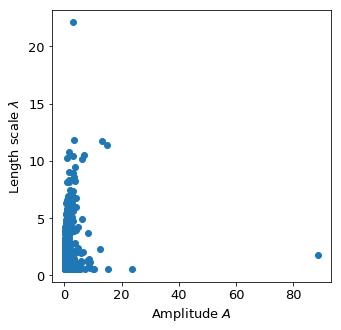

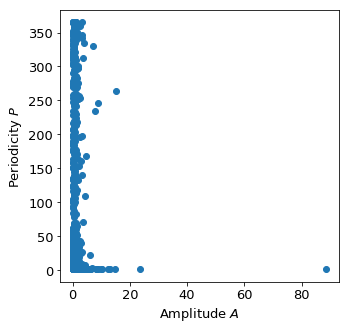

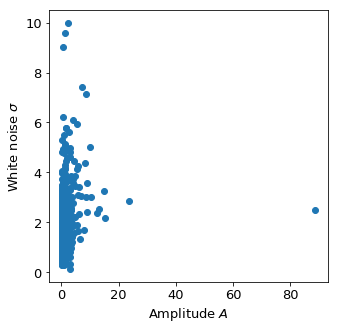

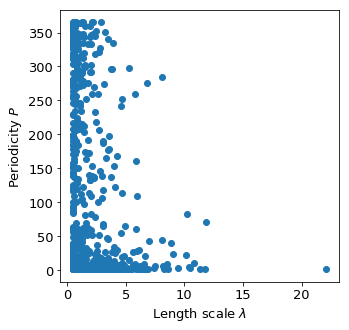

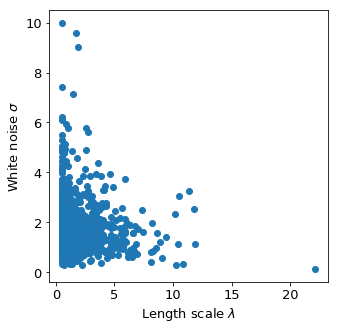

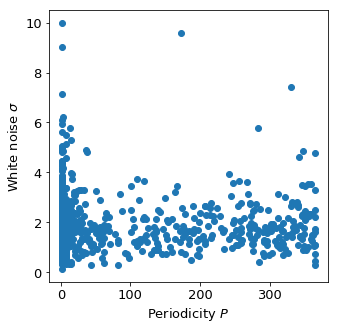

In [31]:
#######################################################################
# Show user similarities in parameter space - before clustering
#######################################################################

if int(extra_type.split('_')[1]) == 1:
    params_names = ['Amplitude $A$', 'Length scale $\lambda$', 'Periodicity $P$', 'White noise $\sigma$']
elif int(extra_type.split('_')[1]) == 3:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'Periodicity', 'White noise']
elif int(extra_type.split('_')[1]) == 4:
    params_names = ['Signal variance', 'Length scale', 'White noise']
elif int(extra_type.split('_')[1]) == 5:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'White noise']
elif int(extra_type.split('_')[1]) == 6:
    params_names = ['Signal variance', 'Length scale', 'Periodicity', 'White noise']
elif int(extra_type.split('_')[1]) == 7:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'Periodicity', 'White noise']
elif int(extra_type.split('_')[1]) == 8:
    params_names = ['Signal variance', 'Length scale', 'White noise']
elif int(extra_type.split('_')[1]) == 9:
    params_names = ['Signal variance', 'Matern length scale', 'Length scale', 'White noise']
else:
    print "err"
    
# params_names = params_names + ['MSD']
# params_names = ['Periodicity', 'MSD WD', 'MSD WE']
# params_names = ['Periodicity', 'STEPS WD', 'STEPS WE', 'MSD WD', 'MSD WE']
# params_names = params_names[:-1]
# params_names = ['Periodicity', 'MSD']
# params_names = ['Signal variance', 'Periodicity']

Nf = len(params_names) # number of features used in clustering
for tx in range(0, Nf-1):
    for ty in range(tx+1, Nf):
        plt.figure(figsize=(5,5))
        plt.scatter(X[:,tx], X[:,ty])
        plt.xlabel(params_names[tx])
        plt.ylabel(params_names[ty])
#         plt.yscale('log')
#         plt.xscale('log')
    #     plt.xlim(0,15)
        plt.show()

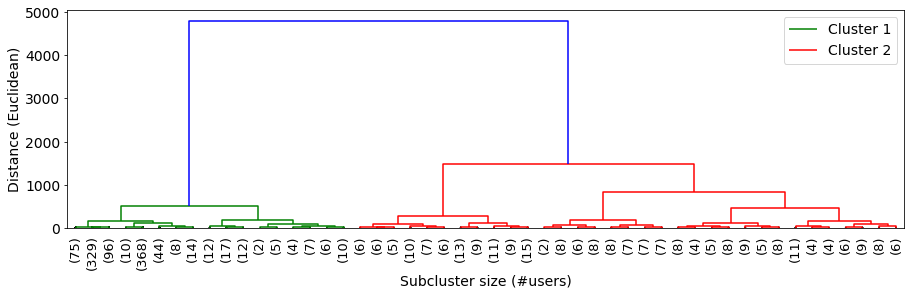

In [42]:
###########################################################
# After data are loaded, cluster it, get linkage matrix
###########################################################

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
# np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# generate the linkage matrix
# USING: Ward variance minimization algorithm.
Z = linkage(X, 'ward') # metric='euclidean'

###########################################################
# Plot dendrogram
###########################################################

max_d = 2000 # cutoff line & color threshold, 2000
last_p = 50# show only the last p merged clusters, 50

plt.figure(figsize=(15, 4))
# plt.title('Hierarchical Clustering Dendrogram (truncated)')
# plt.xlabel('User index or (cluster size)')
plt.xlabel('Subcluster size (#users)', fontsize=14)
plt.ylabel('Distance (Euclidean)', fontsize=14)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=last_p,               # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=13.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    color_threshold=max_d,
)
plt.legend(['Cluster 1', 'Cluster 2'], fontsize=14)
# plt.axhline(y=max_d, c='k') # show cutoff
plt.show()

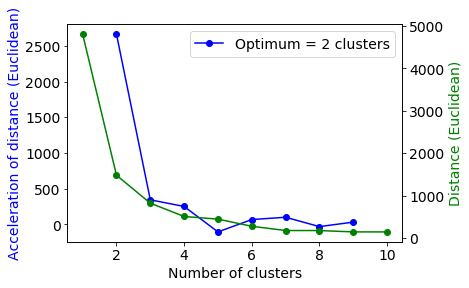

Elbow method: acceleration of distance growth & distance growth are shown
Best #clusters: 2


In [43]:
###########################################################
# Automated selection of #clusters
###########################################################

###########################################################
# 1.) Inconsistency Method - the inconsistency values heavily depend on the depth of the tree you calculate the averages over
# from scipy.cluster.hierarchy import inconsistent
# depth = 5
# incons = inconsistent(Z, depth)
# incons[-10:]

###########################################################
# 2.) Elbow Method - tries to find the clustering step where the acceleration of distance growth is the biggest
# this method will never be able to tell you that all your data is in one single cluster only
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(idxs[:-2] + 1, acceleration_rev, 'bo-', label='Optimum = '+str(acceleration_rev.argmax() + 2) + ' clusters') 
#label='acceleration of distance growth')
ax1.set_ylabel('Acceleration of distance (Euclidean)', color='b')
ax1.set_xlabel('Number of clusters')
ax2.plot(idxs, last_rev, 'go-') #label='distance growth')
ax2.set_ylabel('Distance (Euclidean)', color='g')
ax1.legend()
plt.show()

print "Elbow method: acceleration of distance growth & distance growth are shown"
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print "Best #clusters:", k

In [44]:
###########################################################
# Get cluster labellings - SET #CLUSTERS based on above findings: Elbow method + dendrogram
###########################################################

from scipy.cluster.hierarchy import fcluster
# max_d = 50
# clustering = fcluster(Z, max_d, criterion='distance')
# OR 
k=2
clustering = fcluster(Z, k, criterion='maxclust')
print k

# Silhouette score
from sklearn.metrics import silhouette_score
print "SS:\n",silhouette_score(X, clustering, metric='euclidean')


2
SS:
0.87340695965


Refined centers of 2 clusters and params of several users from the cluster

Cluster 1 :	size:  1019 	  [145, 146] 
[ 8.09714748]

[['7.00012508633']
 ['6.99903744961']] 

Cluster 2 :	size:  245 	  [203, 140] 
[ 249.76922456]

[['365.0']
 ['195.68589293']] 



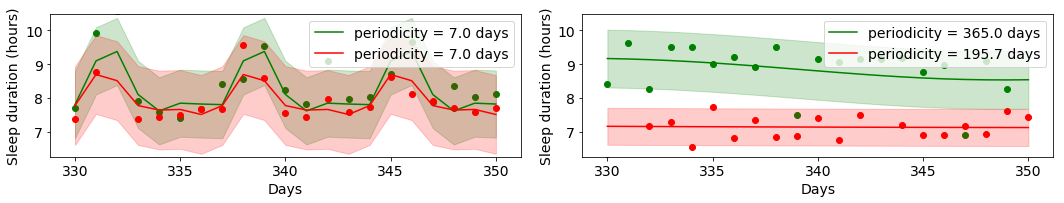

In [45]:
#########################################################################################
# REFINED CENTERS - INTERPRETATION of NON-ORTHOGONAL MEASURES, calculate mean trajectories
#########################################################################################
# Rescale back: NOT NEEDED
# X = scaler.inverse_transform(X)

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

N_users_to_show = 2
show_training_data = False
show_training_data = True
N_stds = 1
trS = 330          # time_range start; 330-350 corresponds to 2017-02-24 -- 2017-03-16
trE = 351          # time_range end
# trS = 0
# trE = 366
colors = ['green', 'red']

GLOBAL_MEAN_SD = 7.26

ymin = 6.27
ymax = 10.5

plt.figure(figsize=(15, 3))

print "Refined centers of", k, "clusters and params of several users from the cluster\n"
refined_centers = []
yeardays = np.arange(366)
mean_traj_m = np.zeros((k, 366)) # means of mean trajectories for each cluster
mean_traj_s = np.zeros((k, 366)) # stds of mean trajectories for each cluster

for i in range(1,k+1):
    di = X[np.where(clustering == i)[0]]       # datapoints of cluster i
    UIDs_i = y[np.where(clustering == i)[0]]   # UIDs of cluster i
    
    indices_to_show = np.random.randint(0,len(di), N_users_to_show) # To show some users from each cluster
    if i == 1: # to reproduce figures
        indices_to_show = [145, 146]
    if i == 2:
        indices_to_show = [203, 140]

    print "Cluster", i,":\tsize: ", len(di), "\t ", indices_to_show, "\n", np.mean(di, axis=0)
    print "\n", di[indices_to_show].astype('str'), "\n"
    refined_centers.append( np.mean(di, axis=0) )
    j = 0
    plt.subplot(1,2,i)
    for UID in UIDs_i: # iterate over users in this cluster
        
        # Extract UID data: predictions
        means = np.load('./../Dataset/Params/clean_' + t + extra_type + '/' + UID + '.npz')['pred_mean']
        stds =  np.load('./../Dataset/Params/clean_' + t + extra_type + '/' + UID + '.npz')['pred_std']
        
        # Simple calculation of mean trajectories / prototypes
#         mean_traj_m[i-1] += means
#         mean_traj_s[i-1] += stds*stds
    
        # Weighted by precisions
        mean_traj_m[i-1] += (means/(stds*stds))
        mean_traj_s[i-1] += 1./(stds*stds)
    
        if UID in UIDs_i[indices_to_show]:
            
            # Plot predictions and org data for some sample users
            plt.fill_between(yeardays[trS:trE], GLOBAL_MEAN_SD + means[trS:trE]-N_stds*stds[trS:trE], 
                             GLOBAL_MEAN_SD + means[trS:trE]+N_stds*stds[trS:trE], alpha=.2, color=colors[j])
            plt.plot(yeardays[trS:trE], GLOBAL_MEAN_SD + means[trS:trE], color=colors[j],
                    label='periodicity = {:.1f}'.format(di[indices_to_show,0][j]) + ' days')
            plt.xlabel('Days')
            plt.ylabel('Sleep duration (hours)')
            plt.xticks(yeardays[trS:trE:5])
            plt.legend()
            if show_training_data:
                dd = np.load('./../Dataset/clean_' + t + '/' + UID + '.npz')['xy']
                xy = np.array( [[xxxx,yyyy]  for xxxx,yyyy in dd if (xxxx >= trS and xxxx < trE)] )
                XX = xy[:,0]
                yy = xy[:,1]
                #plt.legend(['Cluster '+str(i)])
                plt.ylim(ymin,ymax)
                plt.scatter(XX, yy, color=colors[j])
            j += 1
            
    # Simple calculation of mean trajectories / prototypes
#     mean_traj_m[i-1] = mean_traj_m[i-1] / len(UIDs_i)
#     mean_traj_s[i-1] = np.sqrt(mean_traj_s[i-1]) / len(UIDs_i)
    # Weighted by precisions
    mean_traj_m[i-1] = mean_traj_m[i-1] / mean_traj_s[i-1]
    mean_traj_s[i-1] = 1./np.sqrt(mean_traj_s[i-1])
        
refined_centers = np.array(refined_centers)
plt.tight_layout()
plt.show()

# Cluster 1 :	size:  1019 	  [145, 146] 
# [ 8.09714748]

# [['7.00012508633']
#  ['6.99903744961']] 

# Cluster 2 :	size:  245 	  [203, 140] 
# [ 249.76922456]

# [['365.0']
#  ['195.68589293']] 


Test:  2016-03-31 2017-03-31 2017-02-24 2017-03-16
Cluster 1 : 	Min,Max at 83 297
	 which corresponds to dates:  2016-06-22 2017-01-22
Cluster 2 : 	Min,Max at 84 286
	 which corresponds to dates:  2016-06-23 2017-01-11


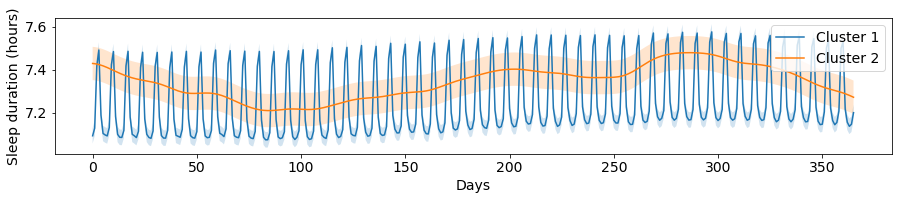

Cluster prototypes


In [46]:
###########################################################
# Show mean trajectories for each cluster
###########################################################
from datetime import datetime, timedelta
def day_to_date(day): # take int day and convert to string date, 0-365 = 31/3/2016-2017
    return (datetime.strptime('2016-03-31', '%Y-%m-%d') + timedelta(days=day)).strftime('%Y-%m-%d')
print 'Test: ', day_to_date(0), day_to_date(365), day_to_date(330), day_to_date(350)

Nstds = 1
plt.figure(figsize=(15, 2.5))
for i in range(k):
    plt.fill_between(yeardays, GLOBAL_MEAN_SD + mean_traj_m[i]-Nstds*mean_traj_s[i], 
                     GLOBAL_MEAN_SD + mean_traj_m[i]+Nstds*mean_traj_s[i], alpha=.2)
    plt.plot(yeardays, GLOBAL_MEAN_SD + mean_traj_m[i], label='Cluster ' + str(i+1))
    print "Cluster", i+1, ": \tMin,Max at", np.argmin(mean_traj_m[i]), np.argmax(mean_traj_m[i])
    print "\t which corresponds to dates: ", day_to_date(np.argmin(mean_traj_m[i])), day_to_date(np.argmax(mean_traj_m[i]))
plt.xlabel('Days')
plt.ylabel('Sleep duration (hours)')
plt.legend()
plt.show()
print "Cluster prototypes"

# When weighted by precision
# Test:  2016-03-31 2017-03-31
# Cluster 1 : 	Min,Max at 83 297
# 	 which corresponds to dates:  2016-06-22 2017-01-22
# Cluster 2 : 	Min,Max at 84 286
# 	 which corresponds to dates:  2016-06-23 2017-01-11

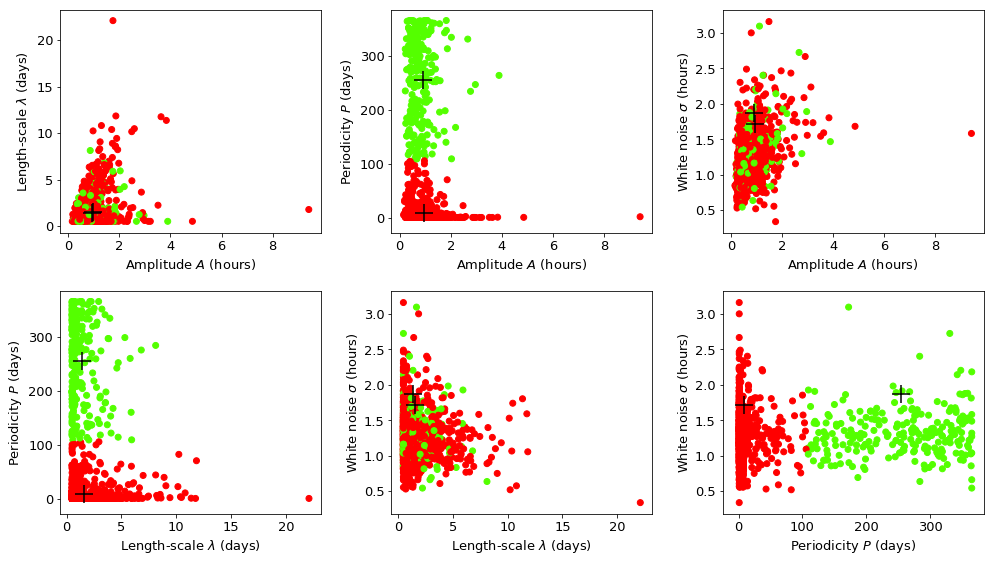

In [39]:
###########################################################
# Show user similarities in parameter space - after clustering
###########################################################

# %matplotlib notebook
# for tx in range(0, Nf-1):
#     for ty in range(tx+1, Nf):
#         plt.figure(figsize=(4,4))
#         plt.scatter(X[:,tx], X[:,ty], c=clustering, cmap='prism')
#         plt.scatter(refined_centers[:,tx], refined_centers[:,ty], marker='+', s=300, c='black')
#         plt.xlabel(params_names[tx])
#         plt.ylabel(params_names[ty])
#         plt.show()
        
#########################################################################
# Clustering results for Periodic kernel, 4 params, no scaling
#########################################################################
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
# Show as one plot, works for 4 params only
params_names = ['Amplitude $A$ (hours)', 'Length-scale $\lambda$ (days)', 'Periodicity $P$ (days)', 'White noise $\sigma$ (hours)']
# Take sqrt of A*A, and noise (variance) to get amplitude and std:
Xp = np.copy(X)
Xp[:,0] = np.sqrt(Xp[:,0])
Xp[:,3] = np.sqrt(Xp[:,3])
i = 0
fig = plt.figure(figsize=(14,8))
for tx in range(0, Nf-1):
    for ty in range(tx+1, Nf):
        i += 1
        ax = fig.add_subplot(2, 3, i) 
        ax.scatter(Xp[:,tx], Xp[:,ty], c=clustering, cmap='prism')
        ax.scatter(refined_centers[:,tx], refined_centers[:,ty], marker='+', s=300, c='black')
        ax.set_xlabel(params_names[tx])
        ax.set_ylabel(params_names[ty])
plt.tight_layout()
plt.show()


In [108]:
###########################################################
# Save clustering as [UID, clusterID] pairs, in string format
###########################################################

if X.shape[1] == 1:
    print "Done 1"
    np.savez('./../Dataset/Clustering/clean_' + t + extra_type + '_1only.npz', c=np.concatenate(([y],[clustering.astype('str')]), axis=0).T)
else:
        np.savez('./../Dataset/Clustering/clean_' + t + extra_type + '.npz', c=np.concatenate(([y],[clustering.astype('str')]), axis=0).T)

Done 1
